In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
data = pd.read_csv("https://raw.githubusercontent.com/rahulhegde99"
      "/Time-Series-Analysis-and-Forecasting-of-Air-Passengers"
        "/master/airpassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['#Passengers']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df_train = df[df["ds"] < "2023-01"]
df_test = df[df["ds"] >= "2023-01"]

In [5]:
model = Prophet()
model.fit(df_train)

15:44:28 - cmdstanpy - INFO - Chain [1] start processing
15:44:28 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
df_future = model.make_future_dataframe(periods =12, freq='MS')
display(df_future)

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
151,1961-08-01
152,1961-09-01
153,1961-10-01
154,1961-11-01


In [8]:
forecast_pro = model.predict(df_future)
forecast_pro[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
151,1961-08-01,577.0,547.0,606.0
152,1961-09-01,529.0,499.0,559.0
153,1961-10-01,494.0,464.0,521.0
154,1961-11-01,460.0,430.0,489.0
155,1961-12-01,489.0,461.0,517.0


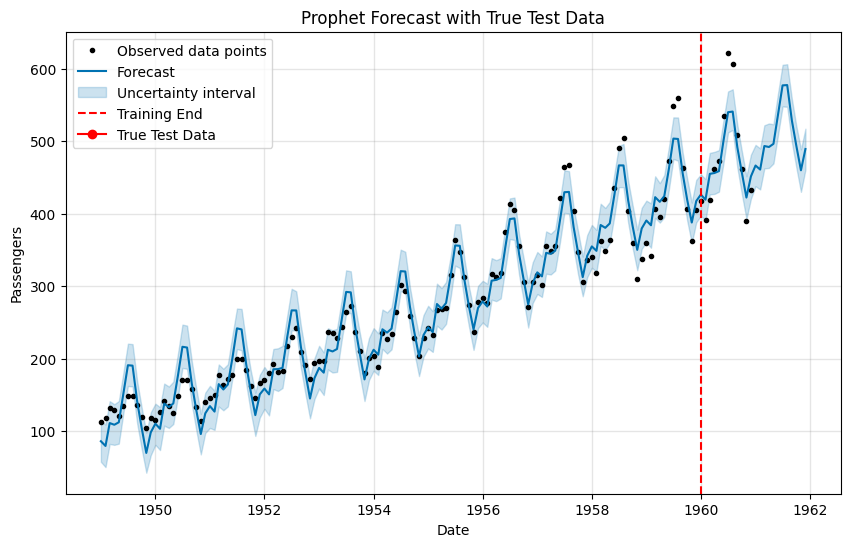

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

model.plot(forecast_pro, ax=ax)

last_train_date = df_train['ds'].iloc[-12]
ax.axvline(x=last_train_date, color='red', linestyle='--', label='Training End')

ax.plot(df_test['ds'], df_test['y'],  'ro-', markersize=6, label='True Test Data')

ax.legend()
plt.title("Prophet Forecast with True Test Data")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.grid(True)
plt.show()

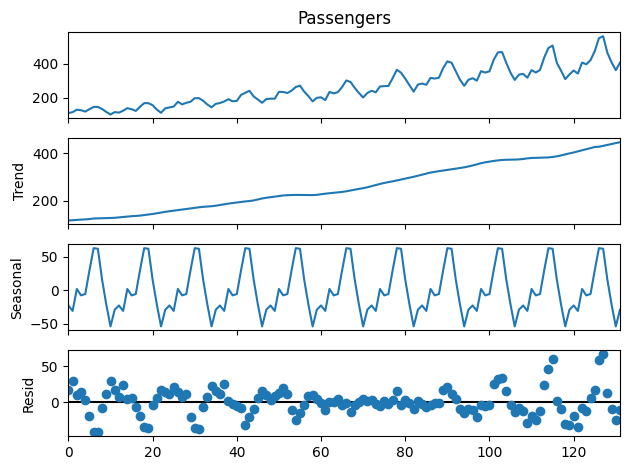

16:11:32 - cmdstanpy - INFO - Chain [1] start processing
16:11:32 - cmdstanpy - INFO - Chain [1] done processing


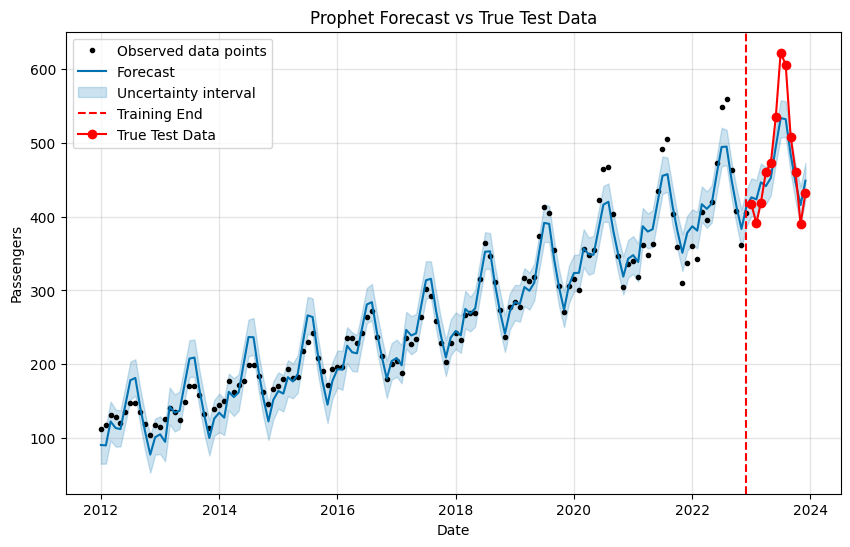

In [20]:
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_data = pd.read_csv("https://raw.githubusercontent.com/jonasdieckmann/prophet_tutorial/main/passengers.csv")
df_data['Month'] = pd.to_datetime(df_data['Month'])

df_data_train = df_data[df_data["Month"] < "2023-01"]
df_data_test = df_data[df_data["Month"] >= "2023-01"]

decompose = seasonal_decompose(df_data_train.Passengers, model='additive', extrapolate_trend='freq', period=12)
decompose.plot()
plt.show()

df_train_prophet = df_data_train.rename(columns={"Month": "ds", "Passengers": "y"})

model_prophet = Prophet()
model_prophet.fit(df_train_prophet)

df_future = model_prophet.make_future_dataframe(periods=12, freq='MS')
forecast_prophet = model_prophet.predict(df_future)

fig, ax = plt.subplots(figsize=(10, 6))

model_prophet.plot(forecast_prophet, ax=ax)

last_training_date = df_train_prophet['ds'].iloc[-1]
ax.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

ax.plot(df_data_test['Month'], df_data_test['Passengers'], 'ro-', markersize=6, label='True Test Data')

ax.legend()
ax.set_title("Prophet Forecast vs True Test Data")
ax.set_xlabel("Date")
ax.set_ylabel("Passengers")
ax.grid(True)
plt.show()
